In [267]:
import pandas as pd

In [268]:
data = pd.read_csv('diabetes_data.csv')

In [269]:
data.shape

(768, 9)

In [270]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [272]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [273]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [274]:
import seaborn as sns

# EDA and Data Preprocessing

### Age

In [275]:
data['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

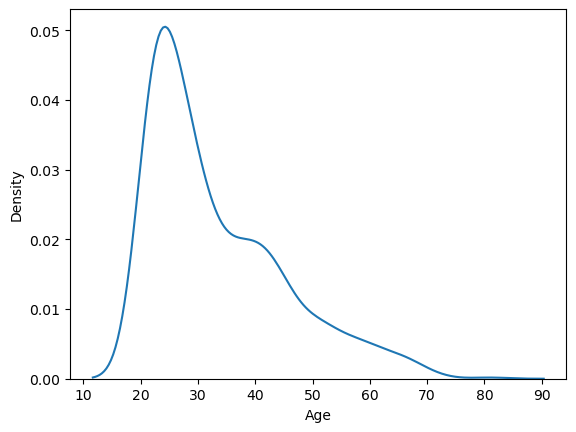

In [276]:
sns.kdeplot(data['Age'])

<Axes: >

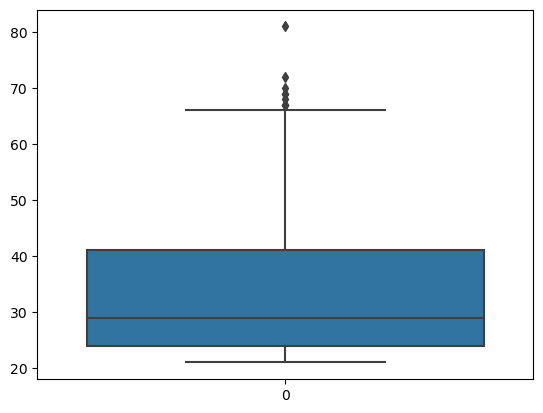

In [277]:
sns.boxplot(data['Age'])

In [278]:
# apply log transform
import numpy as np

data['Age'] = np.log(data['Age']+1)

In [279]:
data['Age'].describe()

count    768.000000
mean       3.481574
std        0.313364
min        3.091042
25%        3.218876
50%        3.401197
75%        3.737670
max        4.406719
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

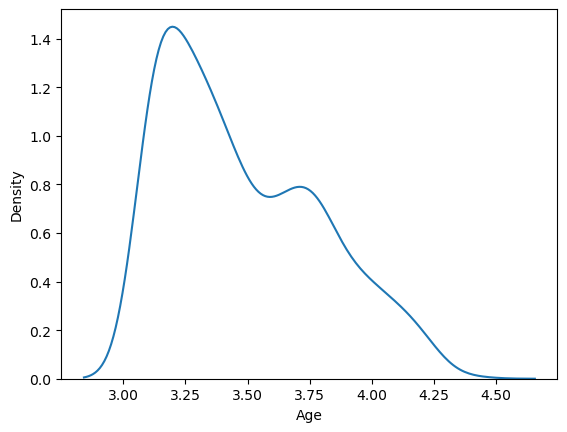

In [280]:
# After log transformation
sns.kdeplot(data['Age'])

### BMI

In [281]:
data['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

<Axes: xlabel='BMI', ylabel='Density'>

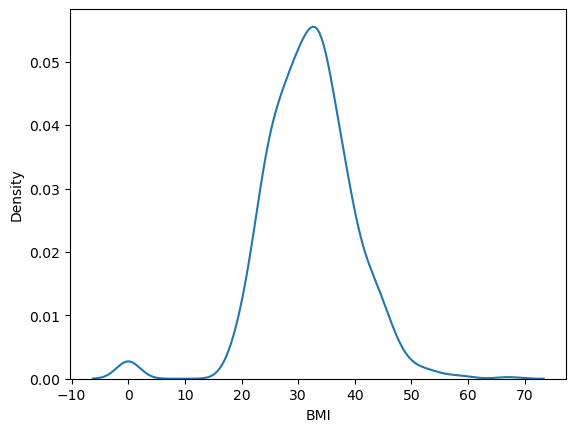

In [282]:
sns.kdeplot(data['BMI'])

<Axes: >

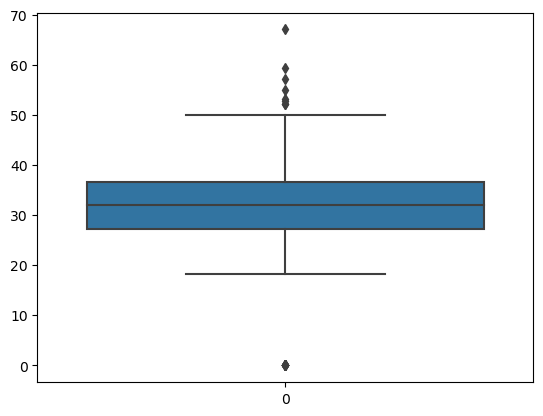

In [283]:
sns.boxplot(data['BMI'])

In [284]:
# Remove outlier
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = data['BMI'].median()
data['BMI'] = data['BMI'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

<Axes: xlabel='BMI', ylabel='Density'>

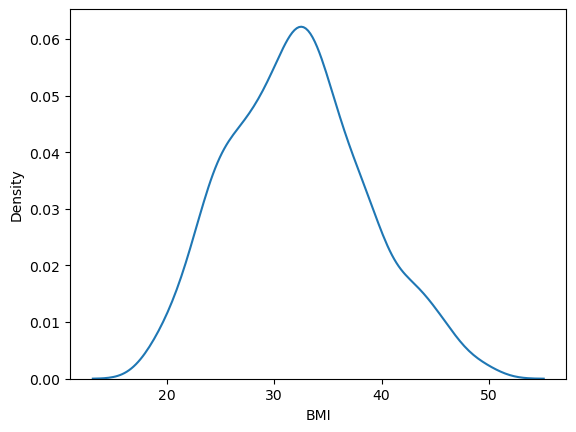

In [285]:
sns.kdeplot(data['BMI'])

<Axes: >

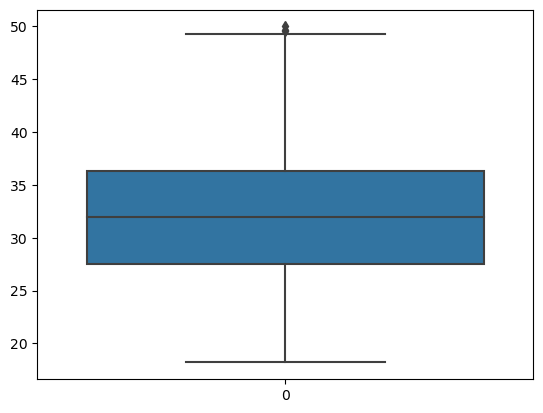

In [286]:
sns.boxplot(data['BMI'])

### BloodPressure

In [287]:
data['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

<Axes: xlabel='BloodPressure', ylabel='Density'>

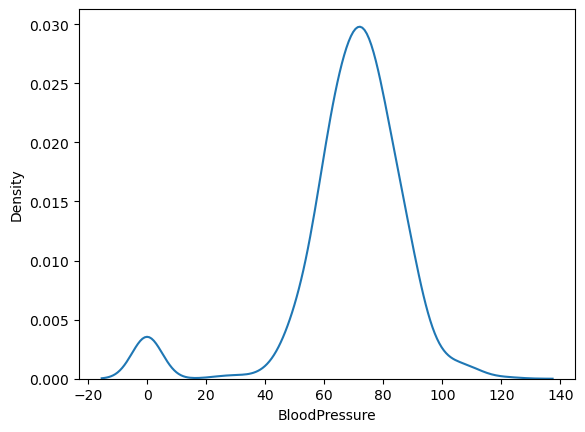

In [288]:
sns.kdeplot(data['BloodPressure'])

<Axes: >

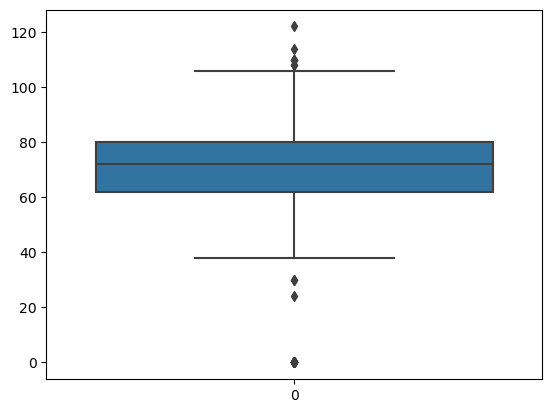

In [289]:
sns.boxplot(data['BloodPressure'])

In [290]:
# Remove outlier
Q1 = data['BloodPressure'].quantile(0.25)
Q3 = data['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = data['BloodPressure'].median()
data['BloodPressure'] = data['BloodPressure'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

<Axes: >

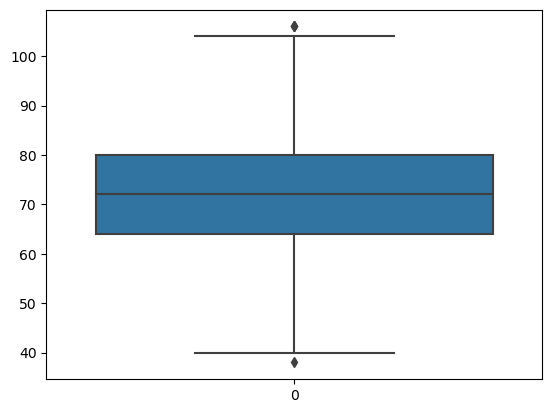

In [291]:
sns.boxplot(data['BloodPressure'])

### DiabetesPedigreeFunction

In [292]:
data['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

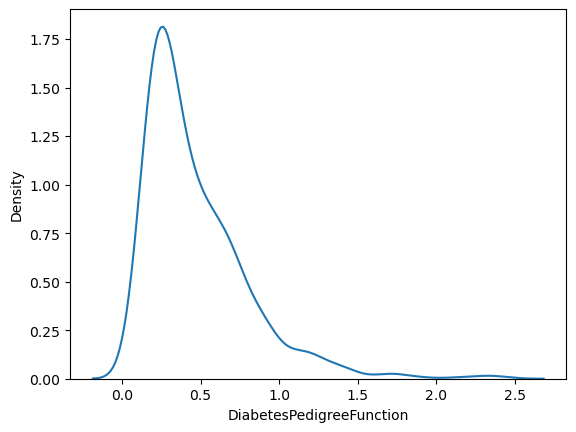

In [293]:
sns.kdeplot(data['DiabetesPedigreeFunction'])

<Axes: >

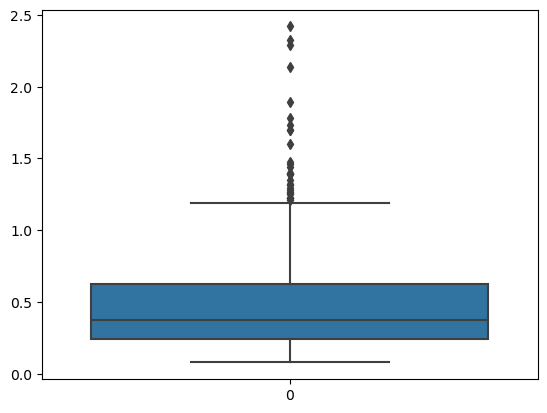

In [294]:
sns.boxplot(data['DiabetesPedigreeFunction'])

In [295]:
# Apply Log Transformation
data['DiabetesPedigreeFunction'] = np.log(data['DiabetesPedigreeFunction']+1)

In [296]:
# Remove outlier
Q1 = data['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = data['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = data['DiabetesPedigreeFunction'].median()
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

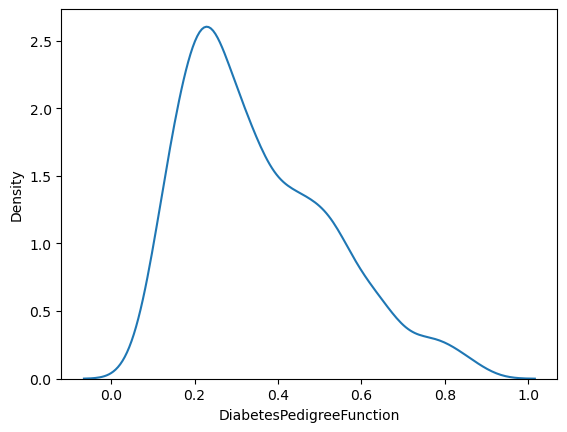

In [297]:
sns.kdeplot(data['DiabetesPedigreeFunction'])

<Axes: >

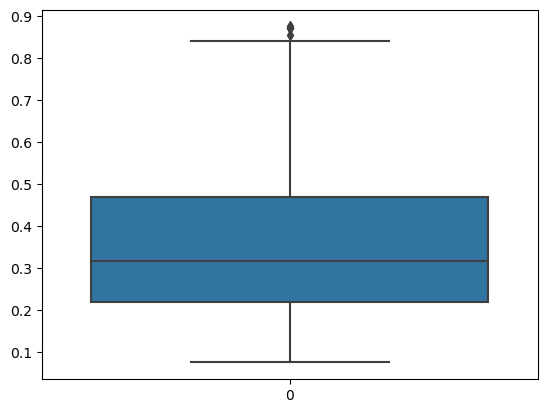

In [298]:
sns.boxplot(data['DiabetesPedigreeFunction'])

### Glucose

In [299]:
data['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

<Axes: >

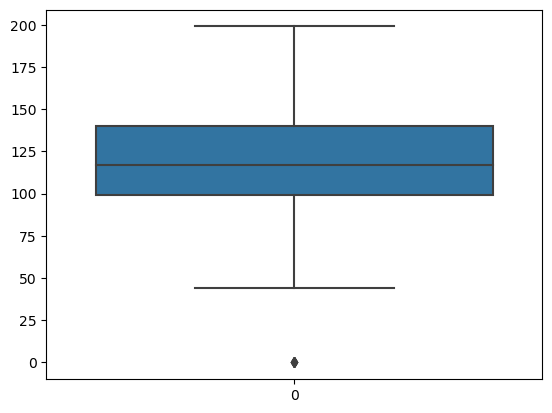

In [300]:
sns.boxplot(data['Glucose'])

In [301]:
# Remove outlier
Q1 = data['Glucose'].quantile(0.25)
Q3 = data['Glucose'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = data['Glucose'].median()
data['Glucose'] = data['Glucose'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

<Axes: >

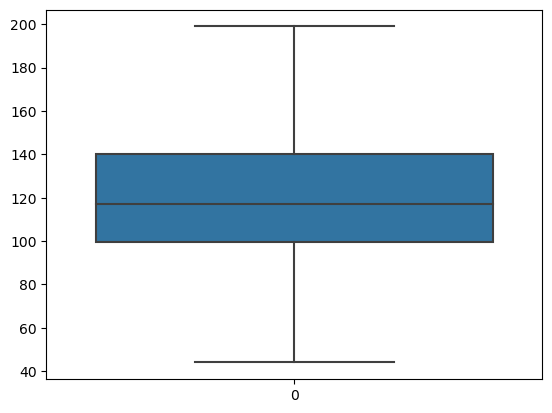

In [302]:
sns.boxplot(data['Glucose'])

### Insulin

In [303]:
data['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

<Axes: xlabel='Insulin', ylabel='Density'>

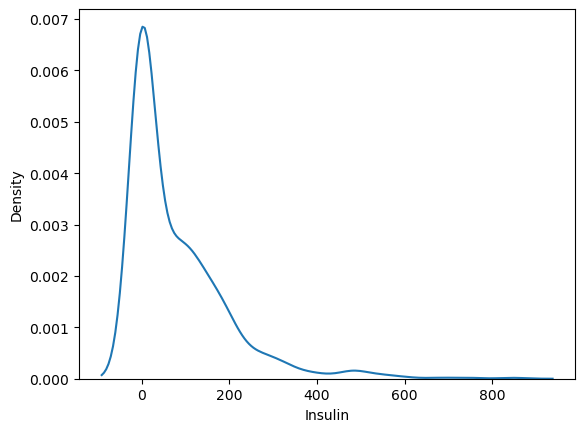

In [304]:
sns.kdeplot(data['Insulin'])

In [305]:
data['Insulin'] = np.log(data['Insulin']+1)

### Pregnancies

In [306]:
data['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

<Axes: >

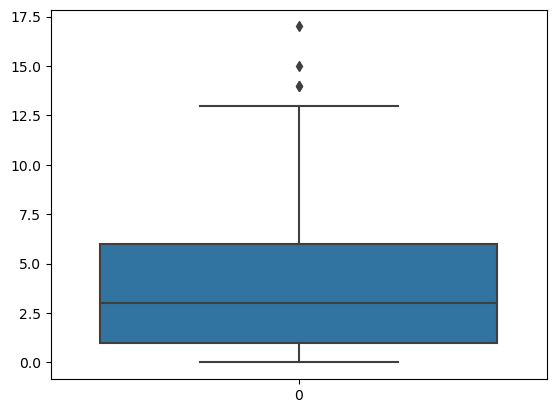

In [307]:
sns.boxplot(data['Pregnancies'])

In [308]:
# Remove outlier
Q1 = data['Pregnancies'].quantile(0.25)
Q3 = data['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_value = data['Pregnancies'].median()
data['Pregnancies'] = data['Pregnancies'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

In [309]:
data['Pregnancies'] = np.log(data['Pregnancies']+1)

<Axes: >

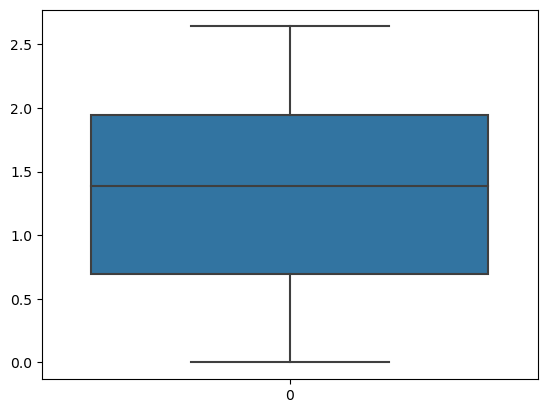

In [310]:
sns.boxplot(data['Pregnancies'])

### SkinThickness

In [311]:
data['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

<Axes: xlabel='SkinThickness', ylabel='Density'>

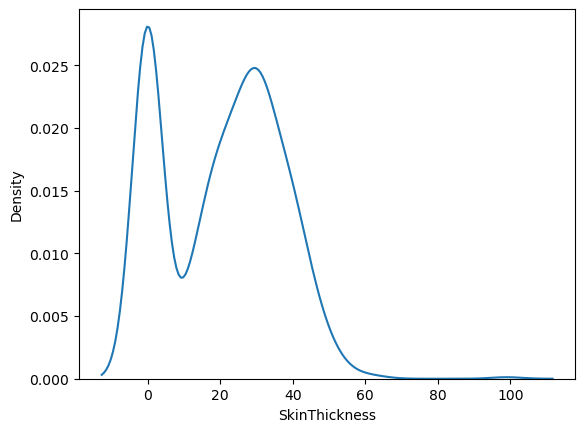

In [312]:
sns.kdeplot(data['SkinThickness'])

In [313]:
from sklearn.preprocessing import PowerTransformer

In [314]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)

In [315]:
data['SkinThickness'] = pt.fit_transform(data[['SkinThickness']])

In [316]:
Y = data['Outcome']
X = data.drop('Outcome', axis=1)

# Model Building

In [317]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [318]:
x_train, y_train, x_test, y_test = train_test_split(X,Y,test_size=0.1)

In [319]:
print(x_train.shape)
print(x_test.shape)

(691, 8)
(691,)


In [320]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),           
    ('logreg', LogisticRegression())        
])

scores = cross_val_score(pipeline, x_train, x_test, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

pipeline.fit(x_train, x_test)

Cross-validation scores: [0.73381295 0.79710145 0.76086957 0.78985507 0.76811594]
Mean accuracy: 0.769950995725159


Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [321]:
import joblib

In [322]:
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']